# Assignment 2
### Sneha V

## 1. Download the dataset

[Churn Modelling](https://drive.google.com/file/d/1_HcM0K8wt4b7FMLkc1V1dv0y6I_9ULzy/view) dataset to be utilized for the following questions

## 2. Load the dataset

Import all the required libraries for the program and load the dataset in a dataframe

In [80]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [81]:
df = pd.read_csv("../Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### Dropping unnecessary columns

Drop columns that are not of interest

In [82]:
df.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## 3. Visualizations

### (i) Univariate Analysis

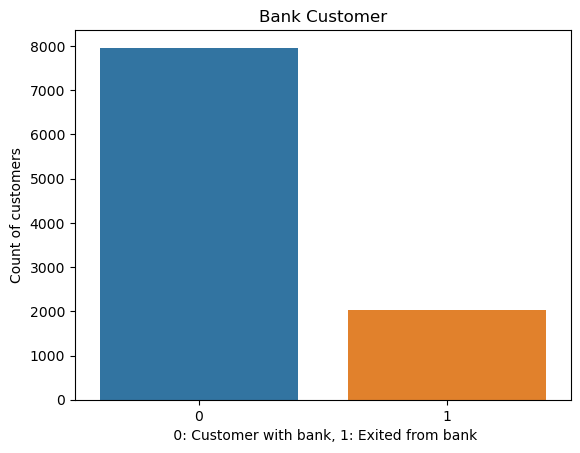

In [83]:
sns.countplot(x="Exited",data=df)
plt.xlabel(" 0: Customer with bank, 1: Exited from bank")
plt.ylabel("Count of customers")
plt.title("Bank Customer")
plt.show()

### (ii) Bivariate Analysis

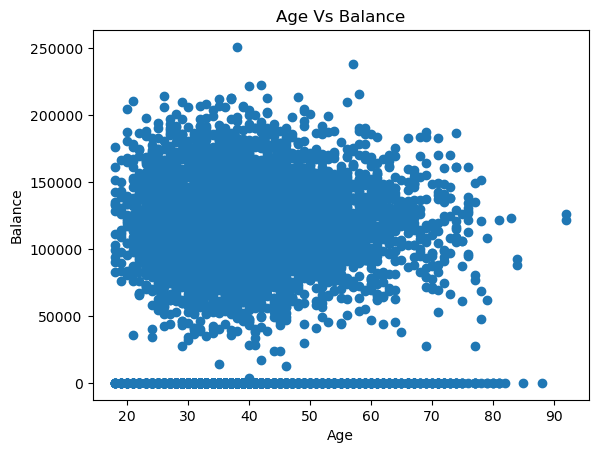

In [84]:
plt.scatter(df["Age"],df["Balance"])
plt.xlabel("Age")
plt.ylabel("Balance")
plt.title("Age Vs Balance")
plt.show()

### (iii) Multivariate Analysis

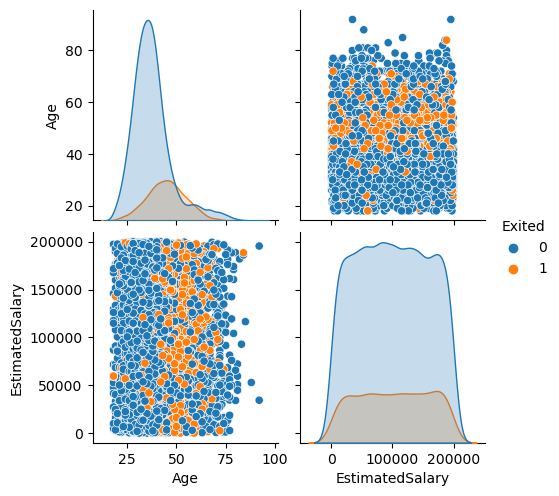

In [85]:
sns.pairplot(df[["Age","Gender","EstimatedSalary","Exited"]],hue="Exited")
plt.show()

## 4. Descriptive Statistics

In [86]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## 5. Handling the Missing Values

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [88]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [89]:
df["CreditScore"].fillna(df["CreditScore"].mean(),inplace=True)
df["Geography"].fillna(df["Geography"].mode(),inplace=True)
df["Gender"].fillna(df["Gender"].mode(),inplace=True)
df["Age"].fillna(df["Age"].mean(),inplace=True)
df["Tenure"].fillna(df["Tenure"].mean(),inplace=True)
df["Balance"].fillna(df["Balance"].mean(),inplace=True)
df["NumOfProducts"].fillna(df["NumOfProducts"].mode(),inplace=True)
df["HasCrCard"].fillna(df["HasCrCard"].mode(),inplace=True)
df["IsActiveMember"].fillna(df["IsActiveMember"].mode(),inplace=True)
df["EstimatedSalary"].fillna(df["EstimatedSalary"].mean(),inplace=True)
df["Exited"].fillna(df["Exited"].mode(),inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## 6. Find the outliers and Replace the outliers

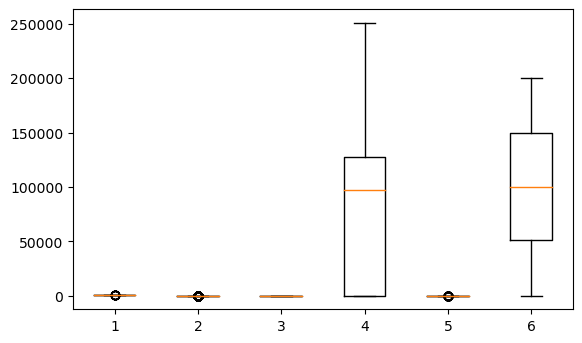

In [90]:
numeric_cols = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
fig = plt.figure(figsize =(5, 3)) 
a = fig.add_axes([0, 0, 1, 1])
bp = a.boxplot(df[numeric_cols])

In [91]:
out=['CreditScore','Age','NumOfProducts']
for i in out:
    for x in [i]:
        q75,q25 = np.percentile(df.loc[:,x],[75,25])
        intr_qr = q75-q25

        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)

        df.loc[df[x] < min,x] = df[i].mode()
        df.loc[df[x] > max,x] = df[i].mode()

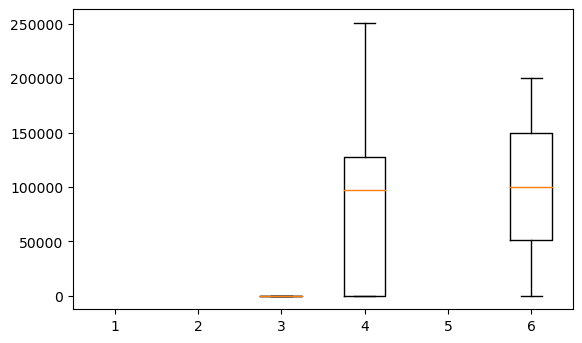

In [92]:
fig = plt.figure(figsize =(5, 3)) 
a = fig.add_axes([0, 0, 1, 1])
bp = a.boxplot(df[numeric_cols])

## 7. Check for Categorical columns and perform encoding

In [93]:
geography = pd.get_dummies(df["Geography"],drop_first=False)
geography

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [94]:
gender = pd.get_dummies(df["Gender"],drop_first=False)
gender

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
9995,0,1
9996,0,1
9997,1,0
9998,0,1


In [95]:
df = pd.concat([df, gender,geography], axis=1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male,France,Germany,Spain
0,619.0,France,Female,42.0,2,0.00,1.0,1,1,101348.88,1,1,0,1,0,0
1,608.0,Spain,Female,41.0,1,83807.86,1.0,0,1,112542.58,0,1,0,0,0,1
2,502.0,France,Female,42.0,8,159660.80,3.0,1,0,113931.57,1,1,0,1,0,0
3,699.0,France,Female,39.0,1,0.00,2.0,0,0,93826.63,0,1,0,1,0,0
4,850.0,Spain,Female,43.0,2,125510.82,1.0,1,1,79084.10,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771.0,France,Male,39.0,5,0.00,2.0,1,0,96270.64,0,0,1,1,0,0
9996,516.0,France,Male,35.0,10,57369.61,1.0,1,1,101699.77,0,0,1,1,0,0
9997,709.0,France,Female,36.0,7,0.00,1.0,0,1,42085.58,1,1,0,1,0,0
9998,772.0,Germany,Male,42.0,3,75075.31,2.0,1,0,92888.52,1,0,1,0,1,0


In [96]:
df.drop(["Gender","Geography"],axis=1,inplace=True)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male,France,Germany,Spain
0,619.0,42.0,2,0.00,1.0,1,1,101348.88,1,1,0,1,0,0
1,608.0,41.0,1,83807.86,1.0,0,1,112542.58,0,1,0,0,0,1
2,502.0,42.0,8,159660.80,3.0,1,0,113931.57,1,1,0,1,0,0
3,699.0,39.0,1,0.00,2.0,0,0,93826.63,0,1,0,1,0,0
4,850.0,43.0,2,125510.82,1.0,1,1,79084.10,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771.0,39.0,5,0.00,2.0,1,0,96270.64,0,0,1,1,0,0
9996,516.0,35.0,10,57369.61,1.0,1,1,101699.77,0,0,1,1,0,0
9997,709.0,36.0,7,0.00,1.0,0,1,42085.58,1,1,0,1,0,0
9998,772.0,42.0,3,75075.31,2.0,1,0,92888.52,1,0,1,0,1,0


## 8. Split the data into dependent and independent variables

In [97]:
## Independent
x = df.drop(['Exited'],axis=1)

In [98]:
x.shape

(10000, 13)

In [99]:
## Dependent
y = df['Exited']

In [100]:
y.shape

(10000,)

## 9. Scale the independent variables

In [101]:
sc = StandardScaler()

In [102]:
## Scaling the independent variables
x = sc.fit_transform(x)
x

array([[-0.3327168 ,  0.47806838, -1.04175968, ...,  0.99720391,
        -0.57873591, -0.57380915],
       [-0.44721972,  0.36446646, -1.38753759, ..., -1.00280393,
        -0.57873591,  1.74273971],
       [-1.55061149,  0.47806838,  1.03290776, ...,  0.99720391,
        -0.57873591, -0.57380915],
       ...,
       [ 0.60412526, -0.20354316,  0.68712986, ...,  0.99720391,
        -0.57873591, -0.57380915],
       [ 1.25991471,  0.47806838, -0.69598177, ..., -1.00280393,
         1.72790383, -0.57380915],
       [ 1.46810183, -1.11235856, -0.35020386, ...,  0.99720391,
        -0.57873591, -0.57380915]])

## 10. Split the data into training and testing

In [103]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [106]:
x_train.shape, x_test.shape

((8000, 13), (2000, 13))

In [107]:
y_train.shape, y_test.shape

((8000,), (2000,))